In [1]:
import wave
import json
from pathlib import Path
import re
from tqdm import tqdm_notebook
import os


def pcm2wav(pcm_file, wav_file, dst_parent, channels=1, bit_depth=16, sampling_rate=16000):

    # Check if the options are valid.
    if bit_depth % 8 != 0:
        raise ValueError("bit_depth "+str(bit_depth) +
                         " must be a multiple of 8.")
    
    if not os.path.exists(dst_parent):
        os.makedirs(dst_parent)
    # Read the .pcm file as a binary file and store the data to pcm_data
    with open(pcm_file, 'rb') as opened_pcm_file:
        pcm_data = opened_pcm_file.read()

        obj2write = wave.open(wav_file, 'wb')
        obj2write.setnchannels(channels)
        obj2write.setsampwidth(bit_depth // 8)
        obj2write.setframerate(sampling_rate)
        obj2write.writeframes(pcm_data)
        obj2write.close()


In [2]:
train_path = Path("/root/develop/data/KsponSpeech")
get = train_path.glob("**/*.pcm")
pcm = [x for x in get if x.is_file()]

In [3]:
len(pcm)

628545

In [4]:
base_path = Path("/root/develop/data/KsponSpeech_wav")

for fpath in tqdm_notebook(pcm):
    fname = fpath.name.split(".")[0]
    wav_name = fname + ".wav"
    
    loc = fpath.parts[5:]
    dst_path = base_path/loc[0]/loc[1]/wav_name
    

    pcm2wav(str(fpath), str(dst_path), str(dst_path.parent),1, 16, 16000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
import scipy.io.wavfile as wf
import matplotlib.pyplot as plt
import soundfile

wav_dir = Path("/root/develop/data/KsponSpeech_wav/KsponSpeech_01/KsponSpeech_0001")
pcm_dir = Path("/root/develop/data/KsponSpeech/KsponSpeech_01/KsponSpeech_0001")

In [38]:
sample_rate, wave = wf.read(wav_dir/"KsponSpeech_000600.wav")

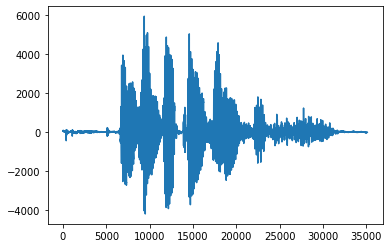

In [42]:
plt.plot(wave)

In [56]:
libri_path = "/root/develop/data/cache/downloads/extracted/048e46f99dbb7f0c6f96d3108b0d1cc3b713b9da314b9c211259f15b4fd8be62/LibriSpeech/dev-clean/1272/128104/1272-128104-0013.flac"

In [57]:
libri_wave = soundfile.read(libri_path)

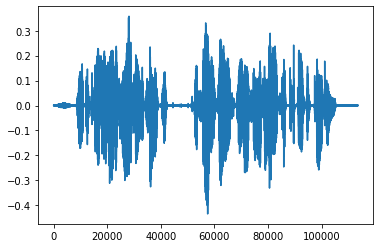

In [58]:
plt.plot(libri_wave[0])